In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datacon-22/Processed_data/bookings.csv
/kaggle/input/datacon-22/Processed_data/hotels_data.csv
/kaggle/input/datacon-22/Processed_data/bookings_data.csv
/kaggle/input/datacon-22/Processed_data/train_data.csv
/kaggle/input/datacon-22/Processed_data/customer_data.csv
/kaggle/input/datacon-22/Processed_data/sample_submission_5.csv
/kaggle/input/datacon-22/Processed_data/payments_data.csv
/kaggle/input/26-11-filtering-columns/__results__.html
/kaggle/input/26-11-filtering-columns/__notebook__.ipynb
/kaggle/input/26-11-filtering-columns/full_data_filtered.csv
/kaggle/input/26-11-filtering-columns/__output__.json
/kaggle/input/26-11-filtering-columns/custom.css


In [2]:
df = pd.read_csv('/kaggle/input/26-11-filtering-columns/full_data_filtered.csv')
df.head(2)

,booking_id,rating_score,set,booking_status,booking_create_timestamp,booking_approved_at,booking_checkin_customer_date,country,payment_type_mode,payment_type_count,...,agent_fees_sum,hotel_category_max,hotel_category_count,hotel_name_length_mean,hotel_description_length_mean,hotel_photos_qty_mean,booking_expiry_date_min,booking_expiry_date_max,booking_expiry_date_count,seller_agent_id_count
0,87114b39712e6da79b0a377eb73fc7af,4,training,5,2008-01-14 15:13:49.000000000,2008-01-14 15:30:59.000000000,2008-01-20 18:25:41.000000000,5,6.0,1.0,...,27.26,69.0,2.0,42.0,858.0,1.0,2018-01-18 15:47:59.000000000,2018-01-18 15:47:59.000000000,1970-01-01 00:00:00.000000002,2.0
1,81e283fa7e4f11123a3fb894f18e6bfb,5,training,5,2008-02-13 10:42:03.000000000,2008-02-13 15:31:21.000000000,2008-03-02 16:16:35.000000000,0,6.0,1.0,...,134.25,69.0,1.0,48.0,562.0,5.0,2018-02-15 15:48:21.000000000,2018-02-15 15:48:21.000000000,1970-01-01 00:00:00.000000001,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99079 entries, 0 to 99078
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   booking_id                     99079 non-null  object 
 1   rating_score                   99079 non-null  int64  
 2   set                            99079 non-null  object 
 3   booking_status                 99079 non-null  int64  
 4   booking_create_timestamp       99079 non-null  object 
 5   booking_approved_at            98924 non-null  object 
 6   booking_checkin_customer_date  96221 non-null  object 
 7   country                        99079 non-null  int64  
 8   payment_type_mode              99079 non-null  float64
 9   payment_type_count             99078 non-null  float64
 10  payment_sequential_sum         99078 non-null  float64
 11  payment_installments_count     99078 non-null  float64
 12  payment_installments_sum       99078 non-null 

# **Continuos columns have outliers in train and test both - kaise handle karte dekhna hai**

# **Abhi to time wale dekhte hai**

In [4]:
df['booking_create_timestamp'] = pd.to_datetime(df['booking_create_timestamp'])
df['booking_approved_at'] = pd.to_datetime(df['booking_approved_at'])
df['booking_checkin_customer_date'] = pd.to_datetime(df['booking_checkin_customer_date'])
df['booking_expiry_date_min'] = pd.to_datetime(df['booking_expiry_date_min'])
df['booking_expiry_date_max'] = pd.to_datetime(df['booking_expiry_date_max'])
df['booking_expiry_date_count'] = pd.to_datetime(df['booking_expiry_date_count'])

**booking_create_timestamp**

In [5]:
import matplotlib.pyplot as plt

In [6]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_create_timestamp"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0], title = 'year')
# df.groupby(df["booking_create_timestamp"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1], title = 'month')
# df.groupby(df["booking_create_timestamp"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2], title = 'day')
# df.groupby(df["booking_create_timestamp"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0], title = 'week')
# df.groupby(df["booking_create_timestamp"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,1], title = 'weekday')
# df.groupby(df["booking_create_timestamp"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,2], title = 'hour')
# fig.suptitle('booking_create_timestamp')

# plt.show()

In [7]:
df["booking_create_timestamp_year"] = df["booking_create_timestamp"].dt.year
df["booking_create_timestamp_month"] = df["booking_create_timestamp"].dt.month
df["booking_create_timestamp_week"] = df["booking_create_timestamp"].dt.isocalendar().week
df["booking_create_timestamp_weekday"] = df["booking_create_timestamp"].dt.weekday
df["booking_create_timestamp_hour"] = df["booking_create_timestamp"].dt.hour

# year - 3 bins

# month: 2-4 and 5-8 and 9-1
df.loc[df["booking_create_timestamp_month"].between(2,4), 'booking_create_timestamp_month'] = 1
df.loc[df["booking_create_timestamp_month"].between(5,8), 'booking_create_timestamp_month'] = 2
df.loc[df["booking_create_timestamp_month"].between(9,12), 'booking_create_timestamp_month'] = 3
df.loc[df["booking_create_timestamp_month"] == 1, 'booking_create_timestamp_month'] = 3

# day- lite

# week is just detailed versuin of month: 2-16 and 17-21 and 22-28 and 29-34 and 34-44 and 45-1
df.loc[df["booking_create_timestamp_week"].between(2,16), 'booking_create_timestamp_week'] = 1
df.loc[df["booking_create_timestamp_week"].between(17,21), 'booking_create_timestamp_week'] = 2
df.loc[df["booking_create_timestamp_week"].between(22,28), 'booking_create_timestamp_week'] = 3
df.loc[df["booking_create_timestamp_week"].between(29,34), 'booking_create_timestamp_week'] = 4
df.loc[df["booking_create_timestamp_week"].between(34,44), 'booking_create_timestamp_week'] = 5
df.loc[df["booking_create_timestamp_week"].between(45,53), 'booking_create_timestamp_week'] = 6
df.loc[df["booking_create_timestamp_week"] == 1, 'booking_create_timestamp_week'] = 6

# hour- 9-22 and 23-8
df.loc[df["booking_create_timestamp_hour"].between(9,22), 'booking_create_timestamp_hour'] = 1
df.loc[df["booking_create_timestamp_hour"].between(23,24), 'booking_create_timestamp_hour'] = 2
df.loc[df["booking_create_timestamp_hour"].between(0,8), 'booking_create_timestamp_hour'] = 2

# weekday- 1-4 and 5-0
df.loc[df["booking_create_timestamp_weekday"].between(1,4), 'booking_create_timestamp_weekday'] = 1
df.loc[df["booking_create_timestamp_weekday"].between(5,6), 'booking_create_timestamp_weekday'] = 2
df.loc[df["booking_create_timestamp_weekday"] == 0, 'booking_create_timestamp_weekday'] = 2

# month
# difference intitate
# chekin vs booking
# checkin day (weekday)

In [8]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_approved_at"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0])
# df.groupby(df["booking_approved_at"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1])
# df.groupby(df["booking_approved_at"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2])
# df.groupby(df["booking_approved_at"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0])
# df.groupby(df["booking_approved_at"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# df.groupby(df["booking_approved_at"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# fig.suptitle('booking_approved_at')

# plt.show()

In [9]:
df["booking_approved_at_year"] = df["booking_approved_at"].dt.year
df["booking_approved_at_month"] = df["booking_approved_at"].dt.month
df["booking_approved_at_week"] = df["booking_approved_at"].dt.isocalendar().week
df["booking_approved_at_weekday"] = df["booking_approved_at"].dt.weekday
df["booking_approved_at_hour"] = df["booking_approved_at"].dt.hour

# all bins here follow the same pattern as earlier
# so not repeating

# year - 3 bins

# month: 2-4 and 5-8 and 9-1
# df.loc[df["booking_approved_at_month"].between(2,4), 'booking_create_timestamp_month'] = 1
# df.loc[df["booking_approved_at_month"].between(5,8), 'booking_create_timestamp_month'] = 2
# df.loc[df["booking_approved_at_month"].between(9,12), 'booking_create_timestamp_month'] = 3
# df.loc[df["booking_approved_at_month"] == 1, 'booking_create_timestamp_month'] = 3

# day- lite
# neeche to naam bhi nahi change kiya

# week is just detailed versuin of month: 2-16 and 17-21 and 22-28 and 29-34 and 34-44 and 45-1
# df.loc[df["booking_create_timestamp_week"].between(2,16), 'booking_create_timestamp_week'] = 1
# df.loc[df["booking_create_timestamp_week"].between(17,21), 'booking_create_timestamp_week'] = 2
# df.loc[df["booking_create_timestamp_week"].between(22,28), 'booking_create_timestamp_week'] = 3
# df.loc[df["booking_create_timestamp_week"].between(29,34), 'booking_create_timestamp_week'] = 4
# df.loc[df["booking_create_timestamp_week"].between(34,44), 'booking_create_timestamp_week'] = 5
# df.loc[df["booking_create_timestamp_week"].between(45,53), 'booking_create_timestamp_week'] = 6
# df.loc[df["booking_create_timestamp_week"] == 1, 'booking_create_timestamp_week'] = 6

# hour- 9-22 and 23-8
# df.loc[df["booking_create_timestamp_hour"].between(9,22), 'booking_create_timestamp_hour'] = 1
# df.loc[df["booking_create_timestamp_hour"].between(23,24), 'booking_create_timestamp_hour'] = 2
# df.loc[df["booking_create_timestamp_hour"].between(0,8), 'booking_create_timestamp_hour'] = 2

# weekday- 1-4 and 5-0
# df.loc[df["booking_create_timestamp_weekday"].between(1,4), 'booking_create_timestamp_weekday'] = 1
# df.loc[df["booking_create_timestamp_weekday"].between(5,6), 'booking_create_timestamp_weekday'] = 2
# df.loc[df["booking_create_timestamp_weekday"] == 0, 'booking_create_timestamp_weekday'] = 2

In [10]:
# fig, axs = plt.subplots(2, 3, figsize = (20,10))

# df.groupby(df["booking_checkin_customer_date"].dt.year)['booking_id'].count().plot(kind="bar", ax = axs[0,0])
# df.groupby(df["booking_checkin_customer_date"].dt.month)['booking_id'].count().plot(kind="bar", ax = axs[0,1])
# df.groupby(df["booking_checkin_customer_date"].dt.day)['booking_id'].count().plot(kind="bar", ax = axs[0,2])
# df.groupby(df["booking_checkin_customer_date"].dt.isocalendar().week)['booking_id'].count().plot(kind="bar", ax = axs[1,0])
# df.groupby(df["booking_checkin_customer_date"].dt.hour)['booking_id'].count().plot(kind="bar", ax = axs[1,1])
# df.groupby(df["booking_checkin_customer_date"].dt.weekday)['booking_id'].count().plot(kind="bar", ax = axs[1,2])
# fig.suptitle('booking_checkin_customer_date')

# plt.show()

In [11]:
df["booking_checkin_customer_date_year"] = df["booking_checkin_customer_date"].dt.year
df["booking_checkin_customer_date_month"] = df["booking_checkin_customer_date"].dt.month
df["booking_checkin_customer_date_week"] = df["booking_checkin_customer_date"].dt.isocalendar().week
df["booking_checkin_customer_date_weekday"] = df["booking_checkin_customer_date"].dt.weekday
df["booking_checkin_customer_date_hour"] = df["booking_checkin_customer_date"].dt.hour

# all bins here follow the same pattern as earlier
# so not repeating

# year - 3 bins

# month: 2-4 and 5-8 and 9-1
df.loc[df["booking_checkin_customer_date_month"].between(2,4), 'booking_checkin_customer_date_month'] = 1
df.loc[df["booking_checkin_customer_date_month"].between(5,8), 'booking_checkin_customer_date_month'] = 2
df.loc[df["booking_checkin_customer_date_month"].between(9,12), 'booking_checkin_customer_date_month'] = 3
df.loc[df["booking_checkin_customer_date_month"] == 1, 'booking_checkin_customer_date_month'] = 3

# day- lite

# week is just detailed versuin of month: 2-11 and 12-18 and 19-28 and 29-35 and 36-46 and 47-1
df.loc[df["booking_checkin_customer_date_week"].between(2,11), 'booking_checkin_customer_date_week'] = 1
df.loc[df["booking_checkin_customer_date_week"].between(12,18), 'booking_checkin_customer_date_week'] = 2
df.loc[df["booking_checkin_customer_date_week"].between(19,28), 'booking_checkin_customer_date_week'] = 3
df.loc[df["booking_checkin_customer_date_week"].between(29,35), 'booking_checkin_customer_date_week'] = 4
df.loc[df["booking_checkin_customer_date_week"].between(36,46), 'booking_checkin_customer_date_week'] = 5
df.loc[df["booking_checkin_customer_date_week"].between(47,53), 'booking_checkin_customer_date_week'] = 6
df.loc[df["booking_checkin_customer_date_week"] == 1, 'booking_checkin_customer_date_week'] = 6

# hour- 9-22 and 23-8
# df.loc[df["booking_create_timestamp_hour"].between(9,22), 'booking_create_timestamp_hour'] = 1
# df.loc[df["booking_create_timestamp_hour"].between(23,24), 'booking_create_timestamp_hour'] = 2
# df.loc[df["booking_create_timestamp_hour"].between(0,8), 'booking_create_timestamp_hour'] = 2

# weekday- 1-4 and 5-0
df.loc[df["booking_checkin_customer_date_weekday"].between(2,3), 'booking_checkin_customer_date_weekday'] = 1
df.loc[df["booking_checkin_customer_date_weekday"].between(4,6), 'booking_checkin_customer_date_weekday'] = 2
df.loc[df["booking_checkin_customer_date_weekday"] == 0, 'booking_checkin_customer_date_weekday'] = 2

### Even newer features

In [12]:
# df['booking_create_timestamp'], 
# df['booking_approved_at'],
# df['booking_checkin_customer_date']

# approved minus created # at end after date ko bhi impute kar diya
# df['booking_approved_minus_created_days'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.days
# df['booking_approved_minus_created_hours'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.total_seconds() / 3600 # difference in hours

# # checkin minus created # at end after date ko bhi impute kar diya
# df['booking_checkin_minus_created_days'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.days
# df['booking_approved_minus_created_hours'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.total_seconds() / 36000 # difference in 10*hours

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99079 entries, 0 to 99078
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   booking_id                             99079 non-null  object        
 1   rating_score                           99079 non-null  int64         
 2   set                                    99079 non-null  object        
 3   booking_status                         99079 non-null  int64         
 4   booking_create_timestamp               99079 non-null  datetime64[ns]
 5   booking_approved_at                    98924 non-null  datetime64[ns]
 6   booking_checkin_customer_date          96221 non-null  datetime64[ns]
 7   country                                99079 non-null  int64         
 8   payment_type_mode                      99079 non-null  float64       
 9   payment_type_count                     99078 non-null  float6

In [14]:
df.loc[df['set'] == 'training', 'booking_approved_at'].isnull().sum(), df.loc[df['set'] == 'testing', 'booking_approved_at'].isnull().sum()

(72, 83)

In [15]:
# df.loc[(df['set'] == 'training') & (df['booking_approved_at'].isnull())]

**ye thode se missing walo ko impute karna padega na**

### Handle Missing Values for each column

**payment_type_count**

In [16]:
import seaborn as sns

In [17]:
df['payment_type_count'].isnull().sum()

1

In [18]:
# sns.countplot(x = df['payment_type_count'], hue = df['set'])

In [19]:
# df.loc[df['payment_type_count'].isnull(), ['payment_type_count', 'booking_status']] # only one row with status as 'completed'
df['payment_type_count_imputed'] = 0
df.loc[df['payment_type_count'].isnull(), 'payment_type_count_imputed'] = 1
df.loc[df['payment_type_count'].isnull(), 'payment_type_count'] = 1 # filling with 1 which is mode

df['payment_type_count'].isnull().sum()

0

**country**

In [20]:
df['country'].isnull().sum()

0

**'payment_type_mode'**

In [21]:
# 'payment_type_mode' has no missing

In [22]:
df['payment_sequential_sum'].mode(), df['payment_installments_count'].mode()

(0    1.0
 dtype: float64,
 0    1.0
 dtype: float64)

In [23]:
df['payment_sequential_sum_imputed'] = 0
df.loc[df['payment_sequential_sum'].isnull(), 'payment_sequential_sum_imputed'] = 1
df.loc[df['payment_sequential_sum'].isnull(), 'payment_sequential_sum'] = 1 # filling with 1 which is mode

df['payment_installments_count_imputed'] = 0
df.loc[df['payment_installments_count'].isnull(), 'payment_installments_count_imputed'] = 1
df.loc[df['payment_installments_count'].isnull(), 'payment_installments_count'] = 1 # filling with 1 which is mode


# taking log2 looks quite reasonable
# itna bhi needed nahi tha

# df['payment_sequential_sum_log2'] = np.log2(df['payment_sequential_sum'])
# df['payment_installments_count_log2'] = np.log2(df['payment_installments_count'])

# df.drop(['payment_sequential_sum', 'payment_installments_count'], axis = 1, inplace = True)

In [24]:
# df['payment_installments_sum'].isnull().sum() # 1
df['payment_installments_sum_imputed'] = 0
df.loc[df['payment_installments_sum'].isnull(), 'payment_installments_sum_imputed'] = 1
df.loc[df['payment_installments_sum'].isnull(), 'payment_installments_sum'] = 1 # filling with 1 which is mode

In [25]:
df['payment_value_count_imputed'] = 0
df.loc[df['payment_value_count'].isnull(), 'payment_value_count_imputed'] = 1
df.loc[df['payment_value_count'].isnull(), 'payment_value_count'] = 1 # filling with 1 which is mode

In [26]:
# sns.histplot(x = df['payment_value_sum'], hue = df['set']) # ye aayi na baat outliers wali
# cap everything above 2000 as 2500
df['payment_value_sum_imputed'] = 0
df.loc[df['payment_value_sum'].isnull(), 'payment_value_sum_imputed'] = 1
df.loc[df['payment_value_sum'].isnull(), 'payment_value_sum'] = 0 

In [27]:
# sns.histplot(x = np.log2(df['payment_value_sum'] + 0.1), hue = df['set']) # added chhotu sa value so that log2 0 does not go mad

In [28]:
df['payment_value_sum_log2'] = np.log2(df['payment_value_sum'] + 0.1)
df.drop('payment_value_sum', axis = 1, inplace = True)

In [29]:
# 'booking_sequence_id_max'
# sns.histplot(x = df['booking_sequence_id_max'], hue = df['set'])

In [30]:
# df.loc[df['booking_sequence_id_max'].isnull(), 'booking_sequence_id_max']
df['booking_sequence_id_max_imputed'] = 0
df.loc[df['booking_sequence_id_max'].isnull(), 'booking_sequence_id_max_imputed'] = 1
df.loc[df['booking_sequence_id_max'].isnull(), 'booking_sequence_id_max'] = 1 # filling with 1 which is mode

In [31]:
df['price_sum_imputed'] = 0
df.loc[df['price_sum'].isnull(), 'price_sum_imputed'] = 1
df.loc[df['price_sum'].isnull(), 'price_sum'] = 1 # filling with 1 which is mode

# sns.histplot(x = np.log2(df['price_sum'] + 0.1), hue = df['set']) # added chhotu sa value so that log2 0 does not go mad

In [32]:
df['price_sum_log2'] = np.log2(df['price_sum']) + 0.1
df.drop('price_sum', axis = 1, inplace = True)

In [33]:
df['agent_fees_sum_imputed'] = 0
df.loc[df['agent_fees_sum'].isnull(), 'agent_fees_sum_imputed'] = 1
df.loc[df['agent_fees_sum'].isnull(), 'agent_fees_sum'] = 1 # filling with 1 which is mode

df['agent_fees_sum_log2'] = np.log2(df['agent_fees_sum'] + 0.1)
df.drop('agent_fees_sum', axis = 1, inplace = True)

In [34]:
# sns.histplot(x = df['hotel_category_count'], hue = df['set'])
df['hotel_category_count_imputed'] = 0
df.loc[df['hotel_category_count'].isnull(), 'hotel_category_count_imputed'] = 1
df.loc[df['hotel_category_count'].isnull(), 'hotel_category_count'] = 1 # filling with 1 which is mode

df['hotel_category_max_imputed'] = 0
df.loc[df['hotel_category_max'].isnull(), 'hotel_category_max_imputed'] = 1
df.loc[df['hotel_category_max'].isnull(), 'hotel_category_max'] = 28 # filling with 1 which is mode

In [35]:
# df['hotel_name_length_mean'].mean(), df['hotel_name_length_mean'].mode() # okay fill with 55

df['hotel_name_length_mean_imputed'] = 0
df.loc[df['hotel_name_length_mean'].isnull(), 'hotel_name_length_mean_imputed'] = 1
df.loc[df['hotel_name_length_mean'].isnull(), 'hotel_name_length_mean'] = 55

In [36]:
# df['hotel_description_length_mean'].mean(), df['hotel_description_length_mean'].mode() # okay fill with 550
df['hotel_description_length_mean_imputed'] = 0
df.loc[df['hotel_description_length_mean'].isnull(), 'hotel_description_length_mean_imputed'] = 1
df.loc[df['hotel_description_length_mean'].isnull(), 'hotel_description_length_mean'] = 550

In [37]:
df['hotel_description_length_mean_log2'] = np.log2(df['hotel_description_length_mean']) + 0.1
df.drop('hotel_description_length_mean', axis = 1, inplace = True)

In [38]:
# df['hotel_photos_qty_mean'].mean(), df['hotel_photos_qty_mean'].mode() # okay fill with 1
df['hotel_photos_qty_mean_imputed'] = 0
df.loc[df['hotel_photos_qty_mean'].isnull(), 'hotel_photos_qty_mean_imputed'] = 1
df.loc[df['hotel_photos_qty_mean'].isnull(), 'hotel_photos_qty_mean'] = 1

In [39]:
df['seller_agent_id_count_imputed'] = 0
df.loc[df['seller_agent_id_count'].isnull(), 'seller_agent_id_count_imputed'] = 1
df.loc[df['seller_agent_id_count'].isnull(), 'seller_agent_id_count'] = 1

In [40]:
#        'booking_approved_at_year', 'booking_approved_at_month',
#        'booking_approved_at_week', 'booking_approved_at_weekday',
#        'booking_approved_at_hour',
df['booking_approved_at_year'].isnull().sum() # same 155 cases having nulls for all these columns

155

In [41]:
df['booking_approved_at_year'].mode().values[0]

2008.0

In [42]:
# only 155 rows hai, unke liye naya col banana lite
df.loc[df['booking_approved_at_year'].isnull(), 'booking_approved_at_year'] = df['booking_approved_at_year'].mode().values[0]
df.loc[df['booking_approved_at_month'].isnull(), 'booking_approved_at_month'] = df['booking_approved_at_month'].mode().values[0]
df.loc[df['booking_approved_at_week'].isnull(), 'booking_approved_at_week'] = df['booking_approved_at_week'].mode().values[0]
df.loc[df['booking_approved_at_weekday'].isnull(), 'booking_approved_at_weekday'] = df['booking_approved_at_weekday'].mode().values[0]
df.loc[df['booking_approved_at_hour'].isnull(), 'booking_approved_at_hour'] = df['booking_approved_at_hour'].mode().values[0]

In [43]:
# 'booking_checkin_customer_date_year',
#        'booking_checkin_customer_date_month',
#        'booking_checkin_customer_date_week',
#        'booking_checkin_customer_date_weekday',
#        'booking_checkin_customer_date_hour',

print(df.loc[(df['set'] == 'training') & (df['booking_checkin_customer_date_year'].isnull())].shape[0])
print(df.loc[(df['set'] == 'testing') & (df['booking_checkin_customer_date_year'].isnull())].shape[0])

1457
1401


In [44]:
df['booking_checkin_customer_date_imputed'] = 0
df.loc[df['booking_checkin_customer_date_year'].isnull(), 'booking_checkin_customer_date_imputed'] = 1

df.loc[df['booking_checkin_customer_date_year'].isnull(), 'booking_checkin_customer_date_year'] = df['booking_checkin_customer_date_year'].mode().values[0]
df.loc[df['booking_checkin_customer_date_month'].isnull(), 'booking_checkin_customer_date_month'] = df['booking_checkin_customer_date_month'].mode().values[0]
df.loc[df['booking_checkin_customer_date_week'].isnull(), 'booking_checkin_customer_date_week'] = df['booking_checkin_customer_date_week'].mode().values[0]
df.loc[df['booking_checkin_customer_date_weekday'].isnull(), 'booking_checkin_customer_date_weekday'] = df['booking_checkin_customer_date_weekday'].mode().values[0]
df.loc[df['booking_checkin_customer_date_hour'].isnull(), 'booking_checkin_customer_date_hour'] = df['booking_checkin_customer_date_hour'].mode().values[0]

In [45]:
#        'booking_approved_minus_created_days',
#        'booking_approved_minus_created_hours',
#        'booking_checkin_minus_created_days'
    
    
# approved minus created 
df['booking_approved_minus_created_days'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.days # decently spread
df['booking_approved_minus_created_hours'] = (df['booking_approved_at'] - df['booking_create_timestamp']).dt.total_seconds() / 3600 # difference in hours

# checkin minus created
df['booking_checkin_minus_created_days'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.days
df['booking_checkin_minus_created_hours'] = (df['booking_checkin_customer_date'] - df['booking_create_timestamp']).dt.total_seconds() / 36000 # difference in 10*hours

In [46]:
# booking_approved_minus_created_days
# sns.histplot(x = df['booking_approved_minus_created_days'], hue = df['set'])

In [47]:
df['booking_approved_minus_created_days_imputed'] = 0
df.loc[df['booking_approved_minus_created_days'].isnull(), 'booking_approved_minus_created_days_imputed'] = 1
df.loc[df['booking_approved_minus_created_days'].isnull(), 'booking_approved_minus_created_days'] = df['booking_approved_minus_created_days'].mode().values[0]

In [48]:
# sns.histplot(x = df['booking_approved_minus_created_hours'], hue = df['set'])

In [49]:
# sns.histplot(x = np.log2(df['booking_approved_minus_created_hours'] + 0.1), hue = df['set'])

In [50]:
df.loc[df['booking_approved_minus_created_hours'].isnull(), 'booking_approved_minus_created_hours'] = df['booking_approved_minus_created_hours'].mode().values[0]
df['booking_approved_minus_created_hours_log2'] = np.log2(df['booking_approved_minus_created_hours'] + 0.1)
df.drop('booking_approved_minus_created_hours', axis = 1, inplace = True)

In [51]:
df.loc[df['booking_checkin_minus_created_days'].isnull(), 'booking_checkin_minus_created_days'] = df['booking_checkin_minus_created_days'].mode().values[0]

In [52]:
df['booking_checkin_minus_created_days_log2'] = np.log2(df['booking_checkin_minus_created_days'] + 0.1)
df.drop('booking_checkin_minus_created_days', axis = 1, inplace = True)

In [53]:
df.loc[df['booking_checkin_minus_created_hours'].isnull(), 'booking_checkin_minus_created_hours'] = 10 # seems like best value
# sns.histplot(x = np.log2(df['booking_checkin_minus_created_hours'] + 0.1), hue = df['set'])

In [54]:
df['booking_checkin_minus_created_hours_log2'] = np.log2(df['booking_checkin_minus_created_hours']) + 0.1
df.drop('booking_checkin_minus_created_hours', axis = 1, inplace = True)

**detect holidays**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99079 entries, 0 to 99078
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   booking_id                                   99079 non-null  object        
 1   rating_score                                 99079 non-null  int64         
 2   set                                          99079 non-null  object        
 3   booking_status                               99079 non-null  int64         
 4   booking_create_timestamp                     99079 non-null  datetime64[ns]
 5   booking_approved_at                          98924 non-null  datetime64[ns]
 6   booking_checkin_customer_date                96221 non-null  datetime64[ns]
 7   country                                      99079 non-null  int64         
 8   payment_type_mode                            99079 non-null  float64       


In [151]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2017-07-01', end='2022-07-31')
data = pd.DataFrame()
data['Date'] = dr

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

data['Holiday'] = data['Date'].isin(holidays)
data

,Date,Holiday
0,2017-07-01,False
1,2017-07-02,False
2,2017-07-03,False
3,2017-07-04,True
4,2017-07-05,False
...,...,...
1852,2022-07-27,False
1853,2022-07-28,False
1854,2022-07-29,False
1855,2022-07-30,False


In [154]:
data['Date'][0]

Timestamp('2017-07-01 00:00:00')

In [155]:
df['booking_checkin_customer_date'].dt.date.astype('datetime64').isin(holidays)

0        False
1        False
2        False
3        False
4        False
         ...  
99074    False
99075    False
99076    False
99077    False
99078    False
Name: booking_checkin_customer_date, Length: 99079, dtype: bool

In [71]:
holidays

DatetimeIndex(['2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27',
               '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11',
               '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
               '2020-02-17', '2020-05-25', '2020-07-03', '2020-09-07',
               '2020-10-12', '2020-11-11', '2020-11-26', '2020-12-25',
               '2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31',
               '2021-07-05', '2021-09-06', '2021-10-11', '2021-11-11',
               '2021-11-25', '2021-12-24', '2021-12-31', '2022-01-17',
               '2022-02-21', '2022-05-30', '2022-07-04'],
              dtype='datetime64[ns]', freq=None)

In [70]:
df['booking_checkin_customer_date'].dt.date.astype('datetime64').isin(holidays)
# .isin(holidays).sum()

0        False
1        False
2        False
3        False
4        False
         ...  
99074    False
99075    False
99076    False
99077    False
99078    False
Name: booking_checkin_customer_date, Length: 99079, dtype: bool

In [74]:
# # df['hols'] = 
# import holidays

# pd.Series(df['booking_checkin_customer_date']).apply(lambda x: holidays.CountryHoliday('US').get(x)).values

In [76]:
from pandas.tseries.holiday import USFederalHolidayCalendar
import pandas as pd

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2017-01-01', end='2023-12-31')

In [81]:
holidays

DatetimeIndex(['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29',
               '2017-07-04', '2017-09-04', '2017-10-09', '2017-11-10',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27',
               '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11',
               '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
               '2020-02-17', '2020-05-25', '2020-07-03', '2020-09-07',
               '2020-10-12', '2020-11-11', '2020-11-26', '2020-12-25',
               '2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31',
               '2021-07-05', '2021-09-06', '2021-10-11', '2021-11-11',
               '2021-11-25', '2021-12-24', '2021-12-31', '2022-01-17',
               '2022-02-21', '2022-05-30', '2022-07-04', '2022-09-05',
      

In [122]:

# 07/28/2014 18:54:55.099', '%m/%d/%Y %H:%M:%S

datetime.datetime(2017, 1, 2, 0, 0)

In [140]:
days_near_holidays = []
for date in holidays:
    days_near_holidays.append(date)
    for i in [-4,-3,-2,-1,1,2,3,4]:
        days_near_holidays.append(date + timedelta(days = i))

In [141]:
days_near_holidays[:5]

[Timestamp('2017-01-02 00:00:00'),
 Timestamp('2016-12-29 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-01 00:00:00')]

In [142]:
from datetime import datetime

days_near_holidays_dt = [datetime.strptime(str(i),'%Y-%m-%d %H:%M:%S') for i in days_near_holidays]
days_near_holidays_dt[:5]

[datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2016, 12, 29, 0, 0),
 datetime.datetime(2016, 12, 30, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 1, 1, 0, 0)]

In [143]:
days_near_holidays_dt = pd.to_datetime([i for i in days_near_holidays_dt])
days_near_holidays_dt

DatetimeIndex(['2017-01-02', '2016-12-29', '2016-12-30', '2016-12-31',
               '2017-01-01', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-16',
               ...
               '2023-11-27', '2023-12-25', '2023-12-21', '2023-12-22',
               '2023-12-23', '2023-12-24', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=630, freq=None)

In [146]:
# list(days_near_holidays_dt)[:5]

[Timestamp('2017-01-02 00:00:00'),
 Timestamp('2016-12-29 00:00:00'),
 Timestamp('2016-12-30 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-01 00:00:00')]

In [149]:
df['booking_checkin_customer_date'].dt.floor('D').isin(days_near_holidays_dt).sum()

0

In [61]:
# finally drop datetype wale columns
df = df.drop(['booking_create_timestamp', 'booking_approved_at', 'booking_checkin_customer_date',
              'booking_create_timestamp', 'booking_approved_at', 'booking_checkin_customer_date',
             'booking_expiry_date_min', 'booking_expiry_date_max', 'booking_expiry_date_count'], axis=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99079 entries, 0 to 99078
Data columns (total 57 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   booking_id                                   99079 non-null  object 
 1   rating_score                                 99079 non-null  int64  
 2   set                                          99079 non-null  object 
 3   booking_status                               99079 non-null  int64  
 4   country                                      99079 non-null  int64  
 5   payment_type_mode                            99079 non-null  float64
 6   payment_type_count                           99079 non-null  float64
 7   payment_sequential_sum                       99079 non-null  float64
 8   payment_installments_count                   99079 non-null  float64
 9   payment_installments_sum                     99079 non-null  float64
 10

In [62]:
df.to_csv('new_cols_full_data_to_use_04-12.csv',index=False)

**outliers hatana padega kya**

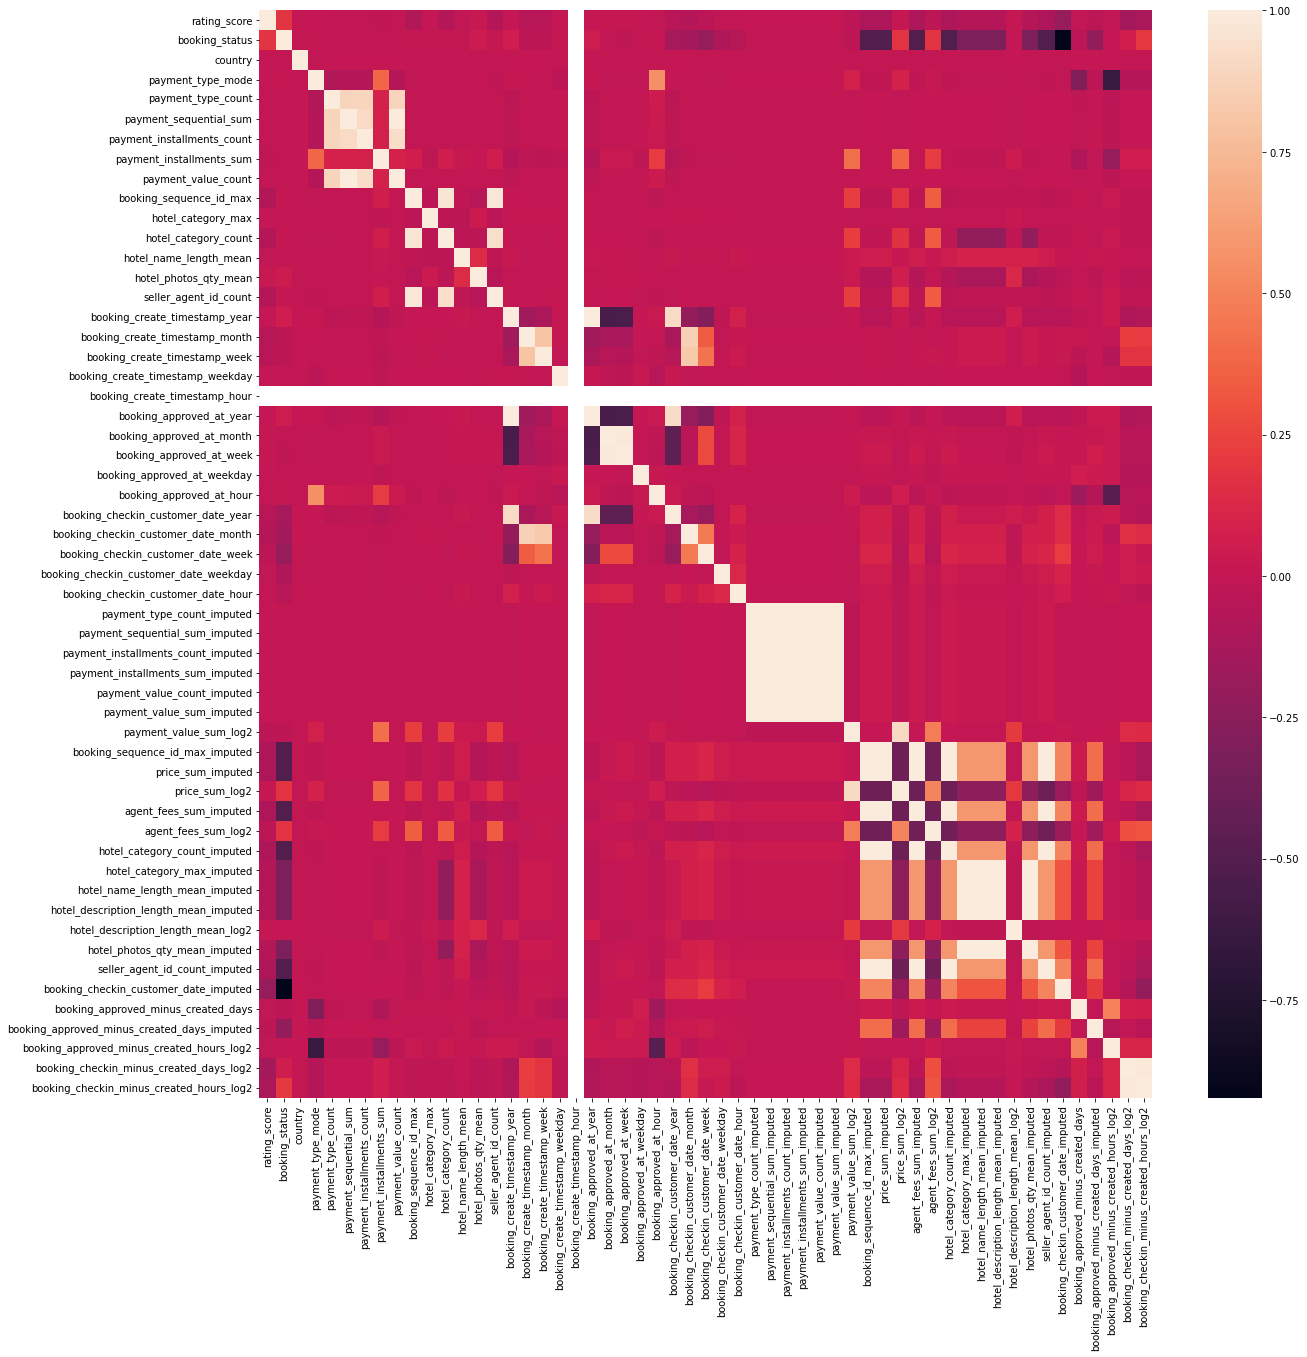

In [67]:
plt.figure(figsize = (20,20))
dataplot = sns.heatmap(df.corr())
plt.show()